In [1]:
import numpy as np

from scipy.interpolate import interp1d
from scipy.signal import argrelmin


from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

import os
import pickle

# Load Positions

In [2]:
run_folder = "track_data/Training_dataset_flat_tech/run-1"
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))

raw_points = [list(pos['position'].to_numpy()) for pos in positions]
    
# remove duplicates:
points = [raw_points[0]]
for point in raw_points[1:]:
    if point != points[-1]:
        points.append(point)

points = np.array(points)
points

array([[1012.79998779,   10.21000004,  720.        ],
       [1012.8001709 ,   10.00696468,  720.0012207 ],
       [1012.8001709 ,   10.00724697,  720.0012207 ],
       ...,
       [ 399.85006714,    9.01868629,  695.77325439],
       [ 399.85879517,    9.02467823,  693.70410156],
       [ 399.85125732,    9.03510857,  691.58825684]])

# Parametric Curve

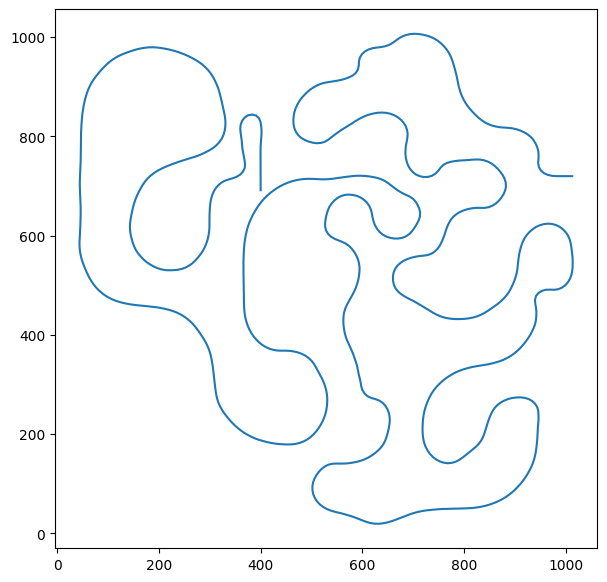

In [14]:
# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )))
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['slinear']
alpha = np.linspace(0, 1, 1000)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve[:, [0, 2]].T, '-', label=method_name);

# plt.plot(*points[:, [0, 2]].T, 'ok', label='original points');
# plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [4]:
interpolator =  interp1d(distance, points, kind='slinear', axis=0)
alpha = np.linspace(0, 1, 1000)
curve = interpolator(alpha)
curve

array([[1012.79998779,   10.21000004,  720.        ],
       [1004.89849665,    9.85909748,  719.99945068],
       [ 996.8026259 ,    9.42452645,  719.99945068],
       ...,
       [ 399.80182695,    9.01718895,  707.80419827],
       [ 399.83272913,    9.02195395,  699.69622177],
       [ 399.85125732,    9.03510857,  691.58825684]])

# Closest Point

In [8]:
def distance_3D(x, y, z, x0, y0, z0):
    d_x = x - x0
    d_y = y - y0
    d_z = z - z0
    dis = np.sqrt( d_x**2 + d_y**2 + d_z**2)
    return dis

In [9]:
# This is what we really got
t = np.linspace(0, 1, 1000)
coords = interpolator(t)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[1012.79998779,   10.21000004,  720.        ],
       [1004.89849665,    9.85909748,  719.99945068],
       [ 996.8026259 ,    9.42452645,  719.99945068],
       ...,
       [ 399.80182695,    9.01718895,  707.80419827],
       [ 399.83272913,    9.02195395,  699.69622177],
       [ 399.85125732,    9.03510857,  691.58825684]])

In [10]:
# The point P
P = (1005, 10, 624)

# compute distance
dis = distance_3D(x, y, z, P[0], P[1], P[2])
# find the minima
min_idxs = np.argmin(dis)
# take the minimum
glob_min_idx = min_idxs
# coordinates and distance
min_x = x[glob_min_idx]
min_y = y[glob_min_idx]
min_z = z[glob_min_idx]
min_d = dis[glob_min_idx]

In [11]:
interpolator(t[glob_min_idx])

array([994.43523598,   9.38572167, 613.1924569 ])

In [12]:
print(min_x, min_y, min_z)

994.4352359756674 9.385721666195712 613.1924568974631


In [13]:
min_d

15.12595665319739

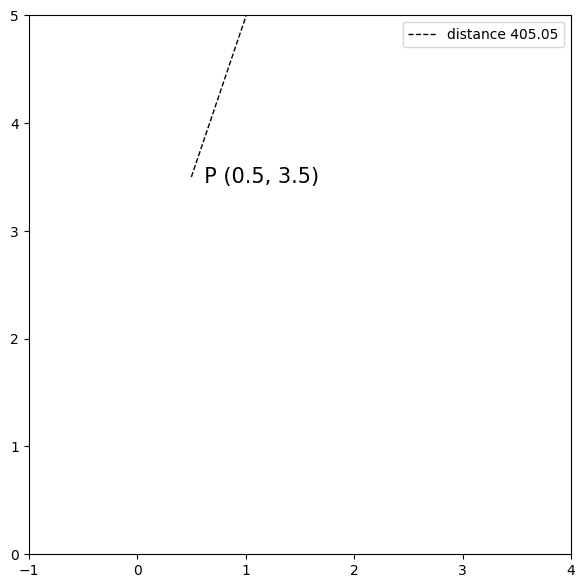

In [64]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x, y, lw=4)
ax.plot(
    [P[0], min_x],
    [P[1], min_y],
    'k--', lw=1,
    label=f'distance {min_d:.2f}'
)
ax.plot(*P, 'or')
ax.text(
    P[0], P[1], 
    f"  P ({P[0]}, {P[1]})", 
    ha='left', va='center',
    fontsize=15
)
ax.set(
    xlim=(-1, 4),
    ylim=(0, 5),
)
ax.legend()
plt.show()

# Angle

In [24]:
a = [0, 1, 2, -1, 4, 5]
np.argmin(a)

3